In [7]:
import azure.cognitiveservices.speech as speechsdk

speech_key, service_region = "28198fb347e3451aabca72831fec42bb", "chinaeast2"
language = 'zh-CN'
def tts_speaker(text):
    speech_config=speechsdk.SpeechConfig(subscription=speech_key,region=service_region)#subscription就知道了是谁
      #构造语音合成服务
    speech_synthesizer=speechsdk.SpeechSynthesizer(speech_config=speech_config)
    result = speech_synthesizer.speak_text_async(text).get()
    
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        print("识别结果 [{}]".format(text))
    if result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = result.cancellation_details
        print("识别取消: {}".format(cancellation_details.reason))
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print("错误: {}".format(cancellation_details.error_details))
        
tts_speaker("Hello World")

识别结果 [Hello World]


In [6]:
tts_speaker("Hello World")

识别结果 [Hello World]


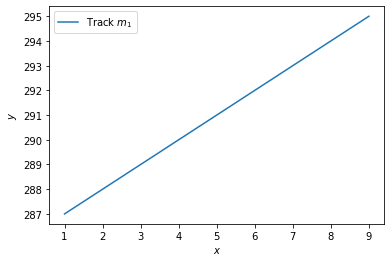

[287 288 289 290 291 292 293 294 295]


In [25]:
#descent loss
import numpy as np
import matplotlib.pyplot as plt
import math


a = 1
b = 1
c = 1
x = np.array([1,2,3,4,5,6,7,8,9])
y = a*x.dot(x)+b*x+c



fig,ax=plt.subplots()
ax.plot(x, y, label=r"Track $m_1$")
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")
ax.legend()
plt.show()



print(y)
gradient_a=0
gradient_b=0

deltaA = -x
deltaB = -1



In [26]:
机器学习
线性回归用于分类
缺点：1.中间区域不够敏感，容易收到数据干扰

Logistic Regression用于分类
1.很平滑
2.0.5的地方很敏感
3.sigmoidal永远的神

逻辑回归模型用于多分类：One vs All分类器
1.A vs Others
2.B vs Others
3.C vs Others



SyntaxError: invalid character in identifier (<ipython-input-26-256b29bc2045>, line 3)

In [27]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras


import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

# 实战！

In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [72]:
import warnings

warnings.filterwarnings('ignore')

In [73]:
data = '/Users/wangxiang/Desktop/sklearn-ml-lab/heart.csv'

df = pd.read_csv(data, header=None)

In [74]:
# view dimensions of dataset

df.shape

(304, 14)

In [75]:
# preview the dataset

df.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,44,1,1,120,263,0,1,173,0,0,2,0,3,1
9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1


In [76]:
#review its info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 14 columns):
0     304 non-null object
1     304 non-null object
2     304 non-null object
3     304 non-null object
4     304 non-null object
5     304 non-null object
6     304 non-null object
7     304 non-null object
8     304 non-null object
9     304 non-null object
10    304 non-null object
11    304 non-null object
12    304 non-null object
13    304 non-null object
dtypes: object(14)
memory usage: 33.3+ KB


In [77]:
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach','exang','oldpeak','slope','ca','thal2','target']

df.columns = col_names

col_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal2',
 'target']

In [82]:
df.head()

df.drop(0,axis=0)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal2,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
8,44,1,1,120,263,0,1,173,0,0,2,0,3,1
9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


for i in range(len(df['age'])): 
    if int(df['age'][i]) > 50:
        df['age']=1
    else:
        df ['age']=0
df['age'].head()

In [83]:
for col in col_names:
    
    print(df[col].value_counts())   

58     19
57     17
54     16
59     14
52     13
51     12
56     11
44     11
60     11
62     11
64     10
41     10
67      9
63      9
65      8
43      8
53      8
45      8
42      8
61      8
55      8
48      7
46      7
66      7
50      7
47      5
49      5
35      4
70      4
68      4
39      4
40      3
69      3
38      3
71      3
34      2
37      2
76      1
74      1
77      1
age     1
29      1
Name: age, dtype: int64
1      207
0       96
sex      1
Name: sex, dtype: int64
0     143
2      87
1      50
3      23
cp      1
Name: cp, dtype: int64
120         37
130         36
140         32
110         19
150         17
138         13
128         12
125         11
160         11
112          9
132          8
118          7
135          6
124          6
108          6
145          5
152          5
134          5
170          4
122          4
100          4
115          3
180          3
126          3
136          3
105          3
142          3
94           2
144   

In [84]:
df['target'].value_counts()

1         165
0         138
target      1
Name: target, dtype: int64

In [85]:
# check missing values in variables

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal2       0
target      0
dtype: int64

In [93]:
X = df.drop(['target'], axis=1)

y = df['target']

In [94]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

In [95]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((243, 13), (61, 13))

In [106]:
# check data types in X_train

X_train.dtypes

age         object
sex         object
cp          object
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal2       object
dtype: object

In [110]:
# import category encoders

import category_encoders as ce

# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg','thalach','exang','oldpeak','slope','ca','thal2'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [111]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [112]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [113]:
y_pred_gini = clf_gini.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8361


In [115]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0',
       '1', '0', '1', '0', '0', 'target', '0', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1',
       '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1',
       '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '0',
       '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1',
       '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0',
       '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0',
       '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '0',
       '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1',
       '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1',
       '1', '1', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0

In [116]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8560


In [117]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8560
Test set score: 0.8361


[Text(334.8, 380.52, 'X[12] <= 1.5\nentropy = 0.501\nsamples = 243\nvalue = [112, 130, 1]'),
 Text(167.4, 271.8, 'X[11] <= 1.5\nentropy = 0.334\nsamples = 132\nvalue = [28, 104, 0]'),
 Text(83.7, 163.07999999999998, 'X[2] <= 1.5\nentropy = 0.199\nsamples = 89\nvalue = [10, 79, 0]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.251\nsamples = 68\nvalue = [10, 58, 0]'),
 Text(251.10000000000002, 163.07999999999998, 'X[2] <= 3.5\nentropy = 0.487\nsamples = 43\nvalue = [18, 25, 0]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.337\nsamples = 28\nvalue = [6, 22, 0]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.32\nsamples = 15\nvalue = [12, 3, 0]'),
 Text(502.20000000000005, 271.8, 'X[2] <= 3.5\nentropy = 0.372\nsamples = 111\nvalue = [84, 26, 1]'),
 Text(418.5, 163.07999999999998, 'X[11] <= 1.5\nentropy = 0.5\nsamples = 39\nvalue = [19, 20, 0]'),
 Text(376.65000000000003, 54.3600000000

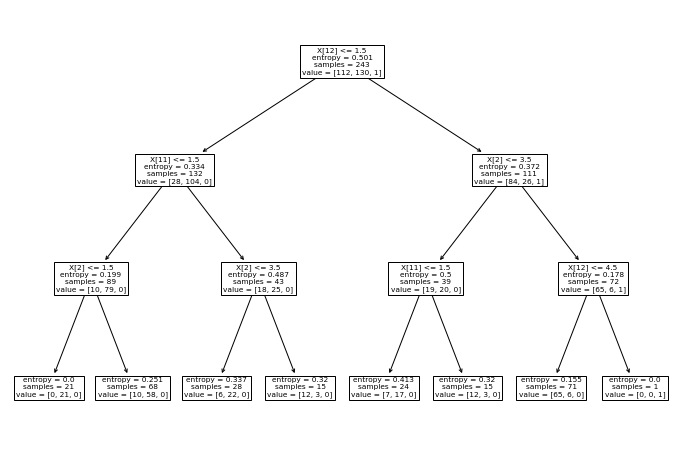

In [118]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH